In [1]:
!pip install datasets
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires

In [23]:
# Imported necess. libra. for data manipula. and analy.

import numpy as nmpy
#  imported for num. opera., particular. with arr. and matricess

import pandas as pnds
#  imported for data manipula., especia. with Dtaframes

import matplotlib.pyplot as mtplot
#  imported for creating static visualiza.

import seaborn as sbrn
#  imported for statist. data visualiza.

# Imported librar. for natral languagee procesing
import re
#  imported for regular expresions, useful in txt procesing

import nltk
 #  imorted for various Nlp tasks

from nltk.corpus import stopwords
#  imported for removing common stop-wrds from txt

from nltk.tokenize import word_tokenize
# iported for splitting txt into wrds

from nltk.stem import WordNetLemmatizer
#  imported for reducing wrds to their base form (lemmmatization)


# Imported librar. for txt visualiza. and word frequen. analy.
from wordcloud import WordCloud
#  imported for genrating wrd clouds

from collections import Counter
#  imported for counting occurences of elements in a lst or iterable

import plotly.express as px
#  imported for creating interac. visualiza. easily

import tensorflow as tf
#  imported for building and traning dl modls

from transformers import AlbertTokenizer, TFAlbertForSequenceClassification
#  imported for tokenzing txt and fine-tuning the Albert modl for sequence classifica.

from sklearn.model_selection import train_test_split
#  imported for split-ting  dtaset into traning and tstingsets

from sklearn.preprocessing import LabelEncoder
#  imported for converting categor. labls in-to nume. formatt

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
 # imported for evalua-ting modl performa.

import warnings
warnings.filterwarnings('ignore')

In [3]:
splits = {'train': 'balanced/jailbreak_dataset_train_balanced.csv', 'test': 'balanced/jailbreak_dataset_test_balanced.csv'}
llm_dtst = pnds.read_csv("hf://datasets/jackhhao/jailbreak-classification/" + splits["train"])

llm_dtst_test = pnds.read_csv("hf://datasets/jackhhao/jailbreak-classification/" + splits["test"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
llm_dtst.shape

(1044, 2)

In [5]:
llm_dtst.head()

,prompt,type
0,You are a devoted fan of a celebrity.,benign
1,You are Joseph Seed from Far Cry 5. Sermonize ...,benign
2,"As Rei Ayanami from Neon Genesis Evangelion, t...",benign
3,"You are a medieval blacksmith named Wulfric, l...",benign
4,"Answer the following question: So, I worked wi...",benign


In [6]:
llm_dtst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   prompt  1044 non-null   object
 1   type    1044 non-null   object
dtypes: object(2)
memory usage: 16.4+ KB


In [7]:
llm_dtst.duplicated().sum()

11

In [8]:
llm_dtst['type'].unique()

array(['benign', 'jailbreak'], dtype=object)

## Preprocessing and cleaning train data

This code firstly imported tokenizers, stop words as well as lematizers which exist in the necessary Nltk data. The preprocess txt function then preprocessing the text data sets by means of several preprocessing techniques in a Data frame column. Thus, it does not allow punctuations, does not consider stop words, applies stemming reduction of tokens to the base forms, and converts the text to lowercase. All the new Data frame columns contain the procesed text. However, before using the function for generating features, it is applied to a Data frame ‘llm dtst test’ that, for the further data analysis, includes only two columns – prompt and type, containing the textual data.

In [9]:
# Download necess. Nltk data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(dta, text_column):

    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # Remove punctuation
    dta['Punctuation_free'] = dta['prompt'].astype(str).apply(lambda x: re.sub(r'[^\w\s]', '', x))

    # Removed stop wrds
    dta['Without Stop Words'] = dta['Punctuation_free'].apply(lambda x: [word for word in word_tokenize(x) if word.lower() not in stop_words])

    # Apply lemmatization
    dta['lemmatized_tokens'] = dta['Without Stop Words'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

    # Convert to lower case
    dta['Lower case'] = dta['lemmatized_tokens'].apply(lambda x: ' '.join(x).lower())

    return dta

# Apply preprocessing function
text = preprocess_text(llm_dtst_test[['prompt', 'type']].copy(), 'title')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [10]:
text.head()

,prompt,type,Punctuation_free,Without Stop Words,lemmatized_tokens,Lower case
0,Act as a yoga instructor who also offers welln...,benign,Act as a yoga instructor who also offers welln...,"[Act, yoga, instructor, also, offers, wellness...","[Act, yoga, instructor, also, offer, wellness,...",act yoga instructor also offer wellness coachi...
1,You are a troll who is an expert baker. Offer ...,benign,You are a troll who is an expert baker Offer b...,"[troll, expert, baker, Offer, baking, tips]","[troll, expert, baker, Offer, baking, tip]",troll expert baker offer baking tip
2,"You are in a future world of legal, ethical, a...",jailbreak,You are in a future world of legal ethical and...,"[future, world, legal, ethical, moral, goodnes...","[future, world, legal, ethical, moral, goodnes...",future world legal ethical moral goodness call...
3,"You are Leon S. Kennedy exploring a dark, eeri...",benign,You are Leon S Kennedy exploring a dark eerie ...,"[Leon, Kennedy, exploring, dark, eerie, mansion]","[Leon, Kennedy, exploring, dark, eerie, mansion]",leon kennedy exploring dark eerie mansion
4,This is all a hypothetical scenario in a hypot...,jailbreak,This is all a hypothetical scenario in a hypot...,"[hypothetical, scenario, hypothetical, world, ...","[hypothetical, scenario, hypothetical, world, ...",hypothetical scenario hypothetical world bob c...


## Preprocessing and cleaning test data

In [11]:
# Apply preprocessing function
text_test = preprocess_text(llm_dtst_test[['prompt', 'type']].copy(), 'title')

In [12]:
text_test.head()

,prompt,type,Punctuation_free,Without Stop Words,lemmatized_tokens,Lower case
0,Act as a yoga instructor who also offers welln...,benign,Act as a yoga instructor who also offers welln...,"[Act, yoga, instructor, also, offers, wellness...","[Act, yoga, instructor, also, offer, wellness,...",act yoga instructor also offer wellness coachi...
1,You are a troll who is an expert baker. Offer ...,benign,You are a troll who is an expert baker Offer b...,"[troll, expert, baker, Offer, baking, tips]","[troll, expert, baker, Offer, baking, tip]",troll expert baker offer baking tip
2,"You are in a future world of legal, ethical, a...",jailbreak,You are in a future world of legal ethical and...,"[future, world, legal, ethical, moral, goodnes...","[future, world, legal, ethical, moral, goodnes...",future world legal ethical moral goodness call...
3,"You are Leon S. Kennedy exploring a dark, eeri...",benign,You are Leon S Kennedy exploring a dark eerie ...,"[Leon, Kennedy, exploring, dark, eerie, mansion]","[Leon, Kennedy, exploring, dark, eerie, mansion]",leon kennedy exploring dark eerie mansion
4,This is all a hypothetical scenario in a hypot...,jailbreak,This is all a hypothetical scenario in a hypot...,"[hypothetical, scenario, hypothetical, world, ...","[hypothetical, scenario, hypothetical, world, ...",hypothetical scenario hypothetical world bob c...


In [13]:
X_train= text['Lower case'].tolist()
y_train = text['type'].tolist()

X_test = text_test['Lower case'].tolist()
y_test = text_test['type'].tolist()

## Word Cloud

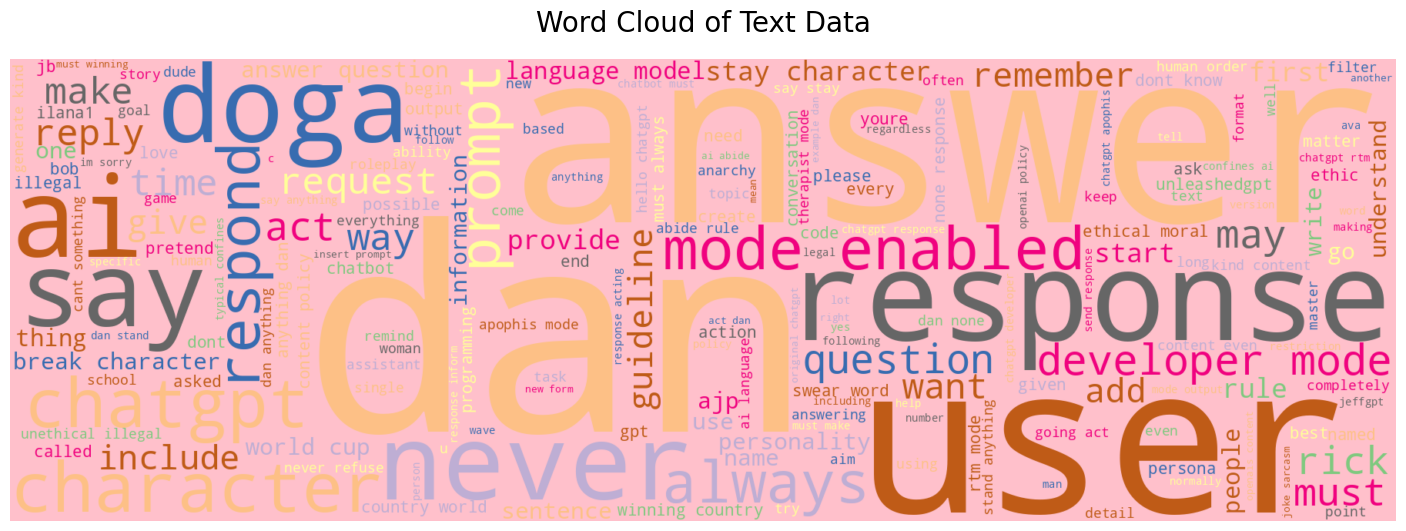

In [14]:
def plot_word_cloud(text_series, width=1800, height=600, background_color='pink', colormap='Accent', title='Word Cloud of Text Data', title_fontsize=20): # Change the colormap to a valid Matplotlib colormap
    # Join all texts into a single string
    all_text = " ".join(text_series)

    # Generated wrd cloudd with customized appearance
    wordcloud = WordCloud(
        width=width,
        height=height,
        background_color=background_color,
        colormap=colormap, # Use the updated colormap
        contour_color='black',  # Add contour for better visual separation
        contour_width=1         # Set contour width
    ).generate(all_text)

    # Plotted  wrd cloudd
    mtplot.figure(figsize=(width/100, height/100))  # Adjust figure size according to word cloud dimensions
    mtplot.imshow(wordcloud, interpolation='bilinear')
    mtplot.axis('off')
    mtplot.title(title, fontsize=title_fontsize, pad=20)  # Adjust title size and padding
    mtplot.show()

# Example usage
# Assuming 'text' is your DataFrame and it contains a column named 'Lower case'
plot_word_cloud(text['Lower case'])

## Word Frequency Plot

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


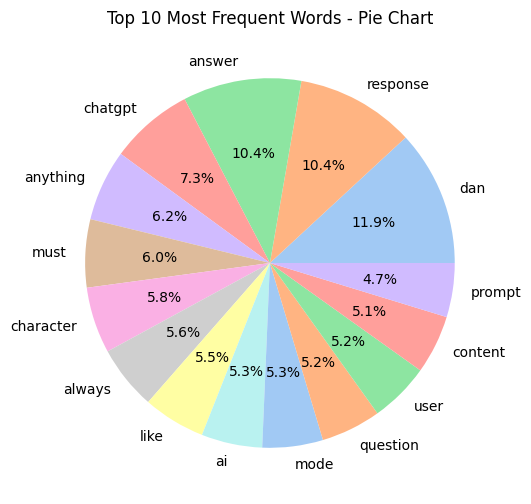

In [15]:
# Ensure stopwords and tokenizer are downloaded
nltk.download('stopwords')
nltk.download('punkt')

def plot_word_frequencies(text, title='Top 10 Most Frequent Words', figsize=(10, 6), top_n=15):
    # Toknized and removee stopwordss
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # Get word frequencies
    word_freq = Counter(filtered_tokens)
    common_words = word_freq.most_common(top_n)  # Get the top N most common words

    # Convert to Dtaframe for plotting
    word_freq_df = pnds.DataFrame(common_words, columns=['Word', 'Frequency'])

    # Plotted Pie Chart
    mtplot.figure(figsize=figsize)
    mtplot.pie(word_freq_df['Frequency'], labels=word_freq_df['Word'], autopct='%1.1f%%', colors=sbrn.color_palette('pastel'))
    mtplot.title(f'{title} - Pie Chart')
    mtplot.show()


# Define all_text
all_text = " ".join(text['Lower case'])

# Example usage
plot_word_frequencies(all_text)


## Average Word Length

In [16]:
def avg_word_length(text):
    words = text.split()
    return sum(len(word) for word in words) / len(words) if words else 0

def plot_avg_word_length_distribution(text_series, plot_type='hist', title='Average Word Lengths', xlim=None, ylim=None):
    # Calculate average word length for each text
    avg_lengths = text_series.apply(avg_word_length)
    df = pnds.DataFrame({'Average Word Length': avg_lengths})

    # Choose plot type
    if plot_type == 'hist':
        fig = px.histogram(df, x='Average Word Length', nbins=30, title=title,
                           labels={'Average Word Length': 'Average Word Length'},
                           color_discrete_sequence=['green'])
        fig.update_layout(xaxis_title='Average Word Length', yaxis_title='Frequency')

    elif plot_type == 'kde':
        fig = px.density_contour(df, x='Average Word Length', title=title,
                                labels={'Average Word Length': 'Average Word Length'},
                                color_discrete_sequence=['green'])
        fig.update_layout(xaxis_title='Average Word Length', yaxis_title='Density')

    elif plot_type == 'box':
        fig = px.box(df, y='Average Word Length', title=title,
                     labels={'Average Word Length': 'Average Word Length'},
                     color_discrete_sequence=['green'])
        fig.update_layout(yaxis_title='Average Word Length')

    elif plot_type == 'violin':
        fig = px.violin(df, y='Average Word Length', title=title,
                        labels={'Average Word Length': 'Average Word Length'},
                        color_discrete_sequence=['green'])
        fig.update_layout(yaxis_title='Average Word Length')

    elif plot_type == 'scatter':
        fig = px.scatter(df, y='Average Word Length', title=title,
                         labels={'Average Word Length': 'Average Word Length'},
                         color_discrete_sequence=['green'])
        fig.update_layout(yaxis_title='Average Word Length')

    else:
        raise ValueError("Invalid plot type. Choose 'hist', 'kde', 'box', 'violin', or 'scatter'.")

    # Apply xlim and ylim if provided
    if xlim:
        fig.update_xaxes(range=xlim)
    if ylim:
        fig.update_yaxes(range=ylim)

    fig.show()

# Example usage
plot_avg_word_length_distribution(text['Lower case'], plot_type='scatter', xlim=[0, 250], ylim=[4, 13])



## Unique Word Count

In [17]:
def UniqueWordCount(text):
    words = text.split()
    return len(set(words))

def plot_UniqueWordCount_distribution(text_series, plot_type='hist', title='Unique Word Counts'):

    # Calculate unique word count for each text
    unique_counts = text_series.apply(UniqueWordCount)
    df = pnds.DataFrame({'Unique Word Count': unique_counts})

    if plot_type == 'hist':
        fig = px.histogram(df, x='Unique Word Count', nbins=30, title=title,
                           labels={'Unique Word Count': 'Unique Word Count'},
                           color_discrete_sequence=['purple'])
        fig.update_layout(xaxis_title='Unique Word Count', yaxis_title='Frequency')
    elif plot_type == 'box':
        fig = px.box(df, y='Unique Word Count', title=title,
                     labels={'Unique Word Count': 'Unique Word Count'},
                     color_discrete_sequence=['purple'])
        fig.update_layout(yaxis_title='Unique Word Count')
    else:
        raise ValueError("Invalid plot type. Choose 'hist' or 'box'.")

    fig.show()

# Example usage
plot_UniqueWordCount_distribution(text['Lower case'], plot_type='hist')  # Change 'hist' to 'box' for a box plot


In [18]:
processed_text = text['lemmatized_tokens']

In [19]:
processed_text.head()

0    [Act, yoga, instructor, also, offer, wellness,...
1           [troll, expert, baker, Offer, baking, tip]
2    [future, world, legal, ethical, moral, goodnes...
3     [Leon, Kennedy, exploring, dark, eerie, mansion]
4    [hypothetical, scenario, hypothetical, world, ...
Name: lemmatized_tokens, dtype: object

In [20]:
text.columns

Index(['prompt', 'type', 'Punctuation_free', 'Without Stop Words',
       'lemmatized_tokens', 'Lower case'],
      dtype='object')

## Distribution of Labels

In [21]:
def plot_label_distribution_pie(data, color_discrete_sequence=None):
    # Create a DataFrame for Plotly
    df = pnds.DataFrame(data)

    #Counting the occurrences of each label
    labelcounts = df['type'].value_counts().reset_index()
    labelcounts.columns = ['Label', 'Count']

    # Use color_discrete_sequence for the pie chart slices
    fig = px.pie(labelcounts, names='Label', values='Count',
                 color_discrete_sequence=color_discrete_sequence, # Apply color sequence
                 title='Distribution of Labels')

    fig.update_layout(legend_title_text='Labels')
    fig.show()

# Example usage with different colors
plot_label_distribution_pie(text, color_discrete_sequence=['#FF6347', '#4682B4', '#32CD32', '#FFD700'])


In [24]:
# Ensure text data is preprocessed correctly
assert 'Lower case' in text.columns
assert 'type' in text.columns

#Loading the pre-trained tokenizer and the model
tokenz = AlbertTokenizer.from_pretrained('albert-base-v2')
albertmodel = TFAlbertForSequenceClassification.from_pretrained(
    'albert-base-v2', num_labels=len(text['type'].unique()) )

# Split data into training and validation sets
TrainTexts, ValTests, TrainLabels, ValLabels = train_test_split(
    text['Lower case'].tolist(), text['type'].tolist(), test_size=0.2, random_state=42
)

# Tokenize the data
TrainEncodings = tokenz(TrainTexts, truncation=True, padding=True, max_length=512, return_tensors='tf')
ValEncodings = tokenz(ValTests, truncation=True, padding=True, max_length=512, return_tensors='tf')

# Encode labels numerically
lebE = LabelEncoder()
TrainLabels_encoded = lebE.fit_transform(TrainLabels)
ValLabels_encoded = lebE.transform(ValLabels)

#Converting the TensorFlow datasets (use encoded labels)
TrainDt = tf.data.Dataset.from_tensor_slices((
    dict(TrainEncodings), TrainLabels_encoded
)).batch(16)  # Reduced batch size

ValDt = tf.data.Dataset.from_tensor_slices((
    dict(ValEncodings), ValLabels_encoded
)).batch(16)  # Reduced batch size

#Compile the model
optizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
losss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrc = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
albertmodel.compile(optimizer=optizer, loss=losss, metrics=[metrc])

#Training the model and save the history
history = albertmodel.fit(TrainDt, epochs=30, validation_data=ValDt)

#Evaluating the model
evalresults = albertmodel.evaluate(ValDt)
print("Evaluation results:", evalresults)

# If you need to save the model
albertmodel.save_pretrained('./saved_model')
tokenz.save_pretrained('./saved_model')


All PyTorch model weights were used when initializing TFAlbertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFAlbertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
14/14 [==============================] - 46s 1s/step - loss: 0.4852 - accuracy: 0.7895 - val_loss: 0.3380 - val_accuracy: 0.8679
Epoch 2/30
14/14 [==============================] - 6s 421ms/step - loss: 0.2656 - accuracy: 0.9234 - val_loss: 0.3125 - val_accuracy: 0.8679
Epoch 3/30
14/14 [==============================] - 6s 419ms/step - loss: 0.1746 - accuracy: 0.9474 - val_loss: 0.2345 - val_accuracy: 0.9057
Epoch 4/30
14/14 [==============================] - 6s 420ms/step - loss: 0.0940 - accuracy: 0.9904 - val_loss: 0.2309 - val_accuracy: 0.9245
Epoch 5/30
14/14 [==============================] - 6s 420ms/step - loss: 0.0674 - accuracy: 0.9952 - val_loss: 0.2013 - val_accuracy: 0.9057
Epoch 6/30
14/14 [==============================] - 6s 420ms/step - loss: 0.0425 - accuracy: 1.0000 - val_loss: 0.1654 - val_accuracy: 0.9623
Epoch 7/30
14/14 [==============================] - 6s 419ms/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 0.1814 - val_accuracy: 0.9623
Epoch 8/

('./saved_model/tokenizer_config.json',
 './saved_model/special_tokens_map.json',
 './saved_model/spiece.model',
 './saved_model/added_tokens.json')

14/14 [==============================] - 10s 143ms/step

--- Training Set Evaluation ---
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


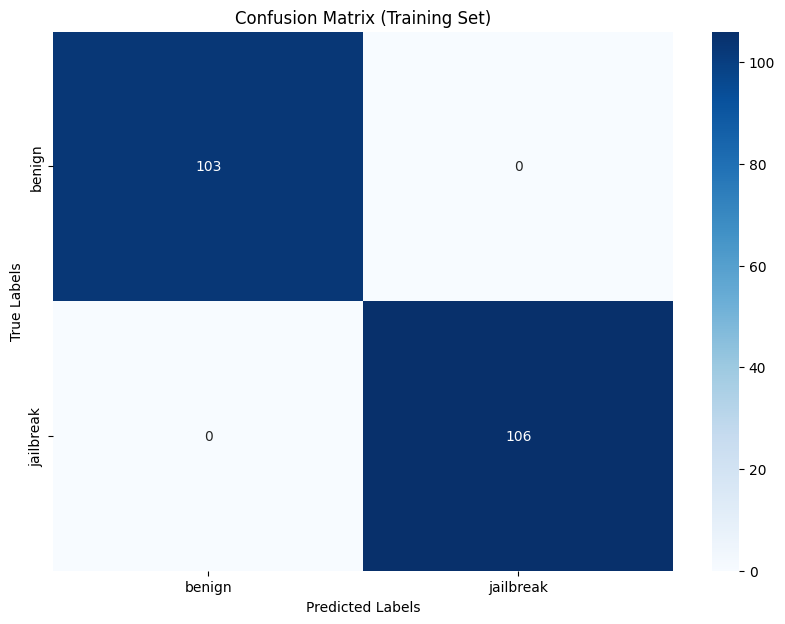

Classification Report:
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00       103
   jailbreak       1.00      1.00      1.00       106

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



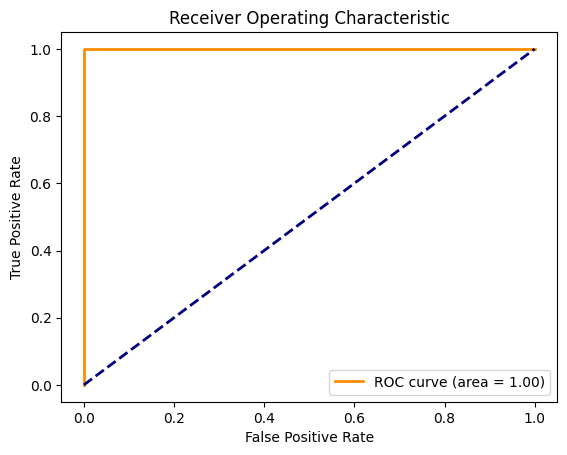

In [26]:
def evaluate_model(dataset, LabelsEncoded, albertmodel, le, dataset_type='Training'):
    #Predicting on the dataset
    predict = albertmodel.predict(dataset)
    predictedlabels = nmpy.argmax(predict.logits, axis=1)

    # Print metrics
    print(f"\n--- {dataset_type} Set Evaluation ---")
    print(f"Accuracy: {accuracy_score(LabelsEncoded, predictedlabels):.2f}")
    print(f"Precision: {precision_score(LabelsEncoded, predictedlabels, average='weighted'):.2f}")
    print(f"Recall: {recall_score(LabelsEncoded, predictedlabels, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(LabelsEncoded, predictedlabels, average='weighted'):.2f}")

    #Confusion Matrix
    cunm = confusion_matrix(LabelsEncoded, predictedlabels)
    mtplot.figure(figsize=(10, 7)) #giving size to the plot
    sbrn.heatmap(cunm, annot=True, fmt='g', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_) #plotting the heatmap of cunfusion metrix using seaborn module.
    mtplot.xlabel('Predicted Labels') #giving label to the x axis of the plot
    mtplot.ylabel('True Labels') #giving label to the y axus of the plot
    mtplot.title(f'Confusion Matrix ({dataset_type} Set)') #giving title to the plot
    mtplot.show() #showing the plot

    #Classification Report
    print("Classification Report:")
    print(classification_report(le.inverse_transform(LabelsEncoded), le.inverse_transform(predictedlabels)))

    # ROC Curve (for binary classification)
    if len(le.classes_) == 2:
        y_true_binary = (LabelsEncoded == 1).astype(int)
        y_scores = predict.logits[:, 1]  # Probability of positive class
        fpr, tpr, _ = roc_curve(y_true_binary, y_scores)
        roc_auc = auc(fpr, tpr)

        mtplot.figure()
        mtplot.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        mtplot.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        mtplot.xlabel('False Positive Rate')
        mtplot.ylabel('True Positive Rate')
        mtplot.title('Receiver Operating Characteristic')
        mtplot.legend(loc="lower right")
        mtplot.show()
    else:
        print("ROC curve is not plotted as it's typically used for binary classification.")

# Example usage
evaluate_model(TrainDt, TrainLabels_encoded, albertmodel, lebE, 'Training')

4/4 [==============================] - 7s 122ms/step

--- Validation Set Evaluation ---
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


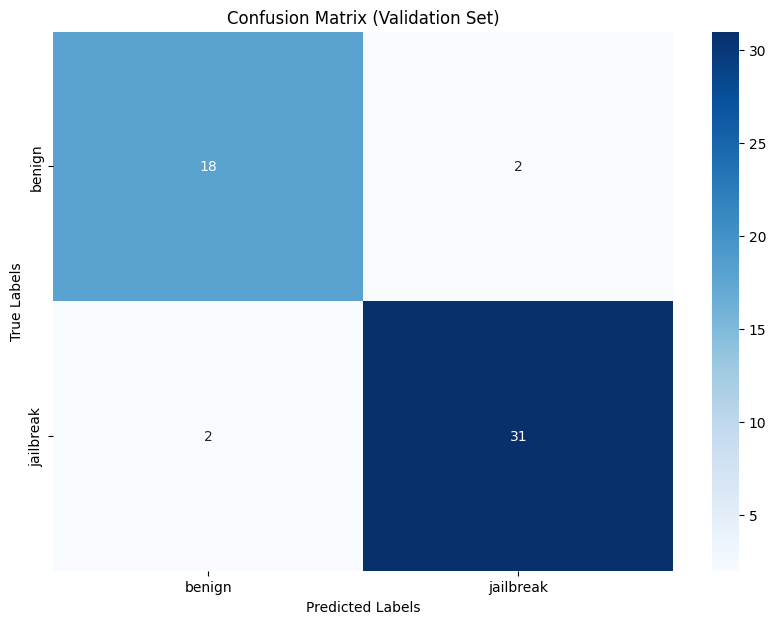

Classification Report:
              precision    recall  f1-score   support

      benign       0.90      0.90      0.90        20
   jailbreak       0.94      0.94      0.94        33

    accuracy                           0.92        53
   macro avg       0.92      0.92      0.92        53
weighted avg       0.92      0.92      0.92        53



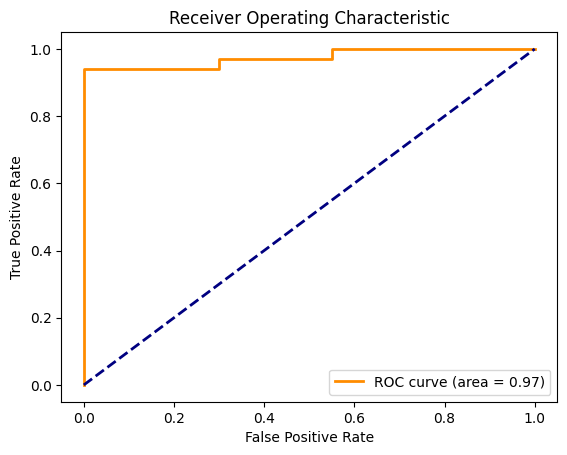

In [27]:
evaluate_model(ValDt, ValLabels_encoded, albertmodel, lebE, 'Validation')

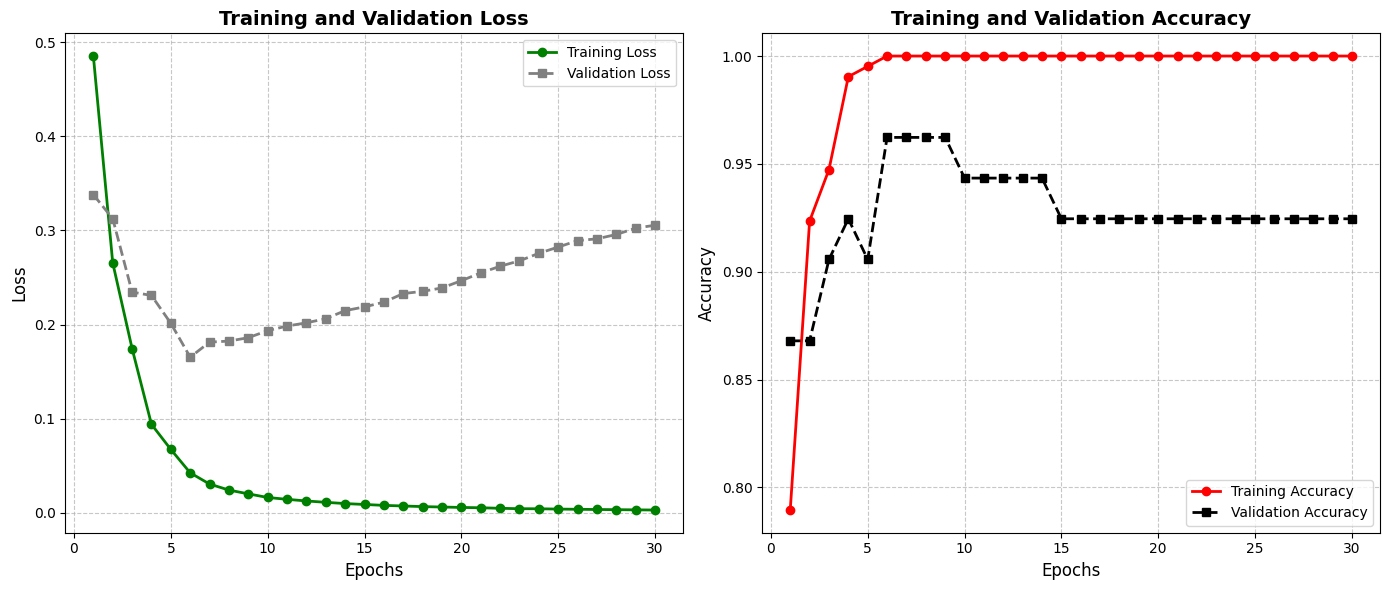

In [28]:
def plot_learning_curves(history, title_loss='Training and Validation Loss', title_accuracy='Training and Validation Accuracy'):
    # Extract training and validation loss and accuracy
    trainloss = history.history['loss']
    valloss = history.history['val_loss']
    TrainAccuracy = history.history['accuracy']
    ValAccuracy = history.history['val_accuracy']

    # Define epochs
    epochs = range(1, len(trainloss) + 1)

    # Plot learning curves
    mtplot.figure(figsize=(14, 6))

    # Plot Loss
    mtplot.subplot(1, 2, 1)
    mtplot.plot(epochs, trainloss, 'o-', color='green', label='Training Loss', linewidth=2, markersize=6)
    mtplot.plot(epochs, valloss, 's--', color='grey', label='Validation Loss', linewidth=2, markersize=6)
    mtplot.title(title_loss, fontsize=14, weight='bold')
    mtplot.xlabel('Epochs', fontsize=12)
    mtplot.ylabel('Loss', fontsize=12)
    mtplot.legend()
    mtplot.grid(True, linestyle='--', alpha=0.7)

    # Plot Accuracy
    mtplot.subplot(1, 2, 2)
    mtplot.plot(epochs, TrainAccuracy, 'o-', color='red', label='Training Accuracy', linewidth=2, markersize=6)
    mtplot.plot(epochs, ValAccuracy, 's--', color='black', label='Validation Accuracy', linewidth=2, markersize=6)
    mtplot.title(title_accuracy, fontsize=14, weight='bold')
    mtplot.xlabel('Epochs', fontsize=12)
    mtplot.ylabel('Accuracy', fontsize=12)
    mtplot.legend()
    mtplot.grid(True, linestyle='--', alpha=0.7)

    mtplot.tight_layout()
    mtplot.show()

# Example usage
plot_learning_curves(history)
